In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import tensorflow.keras.utils
from tensorflow.keras.models import load_model
from tkinter import *
import PIL
from PIL import ImageDraw
import cv2 as cv

In [3]:
model=load_model('model.h5')


In [6]:
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt' #class mapping for data

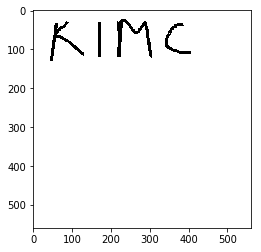

In [29]:
def predict_image(file='image.png'):
    img = PIL.Image.open(file)
    img.save(file)
    img = cv.imread(file, 0)
    edges = cv.Canny(img,50,50)
    mask = cv.dilate(edges, cv.getStructuringElement(cv.MORPH_ELLIPSE,(5, 5)), iterations=2)
    plt.imshow(img,cmap='gray')
    cntrs,_=cv.findContours(mask,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    cntrs=sorted(cntrs,key=lambda x:(cv.boundingRect(x)[0],cv.boundingRect(x)[1]))
    i=0
    op=''
    for cnt in cntrs:
        x,y,w,h = cv.boundingRect(cnt)
        if w>70 or h>70:
            
            current = img[y-int(w/10):y+h+int(w/10), x-int(w/10):x+w+int(w/10)]
            try:
                current=1-cv.resize(current,(28,28))/255
                op+=class_mapping[np.argmax(model.predict(current.reshape(-1,28,28,1)))]
            except:
                pass
    return op
canvas_width = 560
canvas_height = 140

def activate_paint(e):
    global lastx, lasty
    w.bind('<B1-Motion>', paint)
    lastx, lasty = e.x, e.y
def paint( e ):
    global lastx, lasty
    x, y = e.x, e.y
    w.create_line((lastx, lasty, x, y), width=3)
    #  --- PIL
    draw.line((lastx, lasty, x, y), fill='black', width=8)
    lastx, lasty = x, y
def digit_recog():
    save_image()
    op=predict_image()
    lab.configure(text=op)
def save_image():
    image1.save('image.png')
def reset():
    w.delete('all')
    lab.configure(text='')
    global image1,draw
    image1=PIL.Image.new("RGB",(560,560),'white')
    draw=ImageDraw.Draw(image1)
master = Tk()
master.title( "Object Detection and Classification" )
w = Canvas(master, 
           width=canvas_width, 
           height=canvas_height,
           bg='white')
lastx,lasty=None,None
image1=PIL.Image.new("RGB",(560,280),'white')
draw=ImageDraw.Draw(image1)
w.pack(expand = YES, fill = BOTH)
w.bind( "<1>", activate_paint )
lab=Label(master,text='')
submit= Button(master,command=digit_recog,text='Submit')
reset= Button(master,command=reset,text='Reset')
submit.pack(side=BOTTOM)
reset.pack(side=BOTTOM)
message = Label( master, text = "Press and Drag the mouse to draw a number" )
message.pack( side = BOTTOM )
lab.pack(side= BOTTOM)

    
mainloop()
